In [1]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

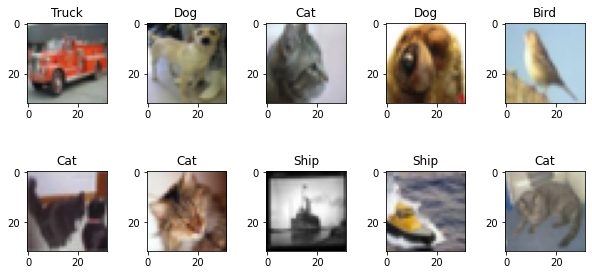

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display random images from the dataset
def display_random_images(images, labels, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    idx = np.random.randint(0, images.shape[0], 10)

    for i, ax in enumerate(axes):
        ax.imshow(images[idx[i]])
        ax.set_title(class_names[labels[idx[i]][0]])
        plt.subplots_adjust(wspace=0.5)

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display random images from the training set
display_random_images(train_images, train_labels, class_names)


In [50]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [51]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4866 - accuracy: 0.4605 - val_loss: 1.2062 - val_accuracy: 0.5695
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1082 - accuracy: 0.6118 - val_loss: 1.1020 - val_accuracy: 0.6082
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9506 - accuracy: 0.6699 - val_loss: 0.9647 - val_accuracy: 0.6644
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8538 - accuracy: 0.7034 - val_loss: 0.9053 - val_accuracy: 0.6883
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7749 - accuracy: 0.7304 - val_loss: 0.9008 - val_accuracy: 0.6977
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7110 - accuracy: 0.7525 - val_loss: 0.8657 - val_accuracy: 0.7088
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6548 - accuracy: 0.7718 - val_loss: 0.8712 - val_accuracy:

In [52]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 70.48%
Test Loss: 1.3508
